In [2]:
import pandas as pd
import numpy as np

#### Reading Movie Information from given dataset

In [3]:
df = pd.read_csv("Amazon - Movies and TV Ratings.csv")
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
users = []
for i in (range(1, len(df)+1)):
    users.append(i)

In [5]:
df['uid'] = users

In [6]:
df.keys()

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202', 'Movie203',
       'Movie204', 'Movie205', 'Movie206', 'uid'],
      dtype='object', length=208)

In [7]:
movies = pd.DataFrame(df.drop(['user_id','uid'], axis=1))
movies.Movie127.isnull().sum()

2535

#### 1.Which movies have maximum views/ratings?

In [8]:
movie_views = []
movieslist = []
ratings = []
for movie in range(1, len(movies.keys())+1):
    x = "Movie"+str(movie)
    movie_views.append(len(movies) - movies[x].isnull().sum())
    movieslist.append(x)
    ratings.append(movies[x].mean())
print(movie_views)

[1, 1, 1, 2, 29, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 320, 1, 1, 2, 1, 1, 2, 3, 5, 1, 3, 1, 3, 243, 2, 2, 2, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 7, 2, 1, 1, 1, 1, 1, 1, 2, 17, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 12, 2, 1, 1, 3, 21, 1, 1, 83, 18, 128, 101, 2, 3, 6, 3, 5, 1, 2, 1, 5, 2, 272, 4, 3, 1, 39, 54, 13, 8, 39, 2, 4, 7, 1, 1, 11, 5, 8, 3, 4, 4, 1, 4, 5, 2, 2313, 3, 3, 4, 4, 3, 1, 6, 1, 2, 3, 13, 4, 578, 7, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 2, 1, 4, 66, 2, 6, 25, 15, 13, 4, 1, 2, 4, 4, 4, 3, 1, 2, 15, 4, 1, 1, 1, 1, 7, 1, 2, 30, 1, 17, 24, 9, 1, 6, 5, 7, 6, 10, 7, 7, 1, 9, 5, 2, 1, 8, 3, 6, 1, 8, 35, 13]


In [9]:
movie_views = pd.DataFrame(movie_views)
movie_views['moviename'] = movieslist
movie_views['ratings'] = ratings

In [10]:
movie_views['views'] = movie_views[0]

In [11]:
movie_views.drop([0],axis=1, inplace=True)
movie_views

,moviename,ratings,views
0,Movie1,5.000000,1
1,Movie2,5.000000,1
2,Movie3,2.000000,1
3,Movie4,5.000000,2
4,Movie5,4.103448,29
...,...,...,...
201,Movie202,4.333333,6
202,Movie203,3.000000,1
203,Movie204,4.375000,8
204,Movie205,4.628571,35


In [12]:
movie_views = movie_views.sort_values(by=["views"], ascending=False)

In [13]:
movie_views[movie_views.views==movie_views.views.max()].moviename

126    Movie127
Name: moviename, dtype: object

##### From the above analysis Movie 127 has the maximum views/rating.

#### Define the top five movies with max ratings

In [14]:
movie_views_max_rating = movie_views.sort_values(by=["views","ratings"], ascending=[False, False])
movie_views_max_rating.head()

,moviename,ratings,views
126,Movie127,4.111976,2313
139,Movie140,4.833910,578
15,Movie16,4.518750,320
102,Movie103,4.562500,272
28,Movie29,4.806584,243


#### Define the top 5 movies with the least audience.

In [15]:
movie_views_max_rating_min_audience = movie_views.sort_values(by=["ratings", "views"], ascending=[False, True])
movie_views_max_rating_min_audience.head()

,moviename,ratings,views
32,Movie33,5.0,1
164,Movie165,5.0,1
198,Movie199,5.0,1
6,Movie7,5.0,1
20,Movie21,5.0,1


#### Visualize the data

In [16]:
import matplotlib.pyplot as plt

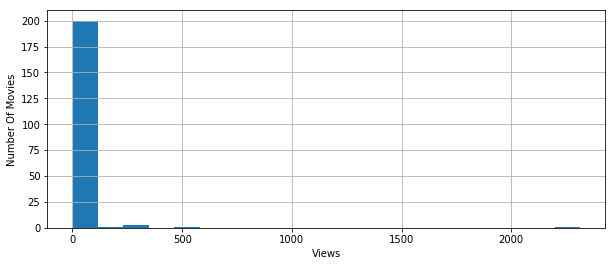

In [17]:
plt.figure(figsize=(10,4))
plt.xlabel('Views')
plt.ylabel('Number Of Movies')
movie_views_max_rating.views.hist(bins=20)

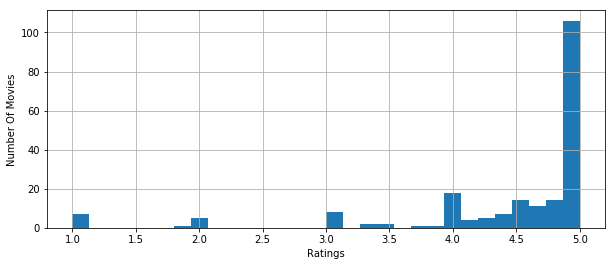

In [18]:
plt.figure(figsize=(10,4))
plt.xlabel('Ratings')
plt.ylabel('Number Of Movies')
movie_views_max_rating.ratings.hist(bins=30)

In [19]:
import seaborn as sn

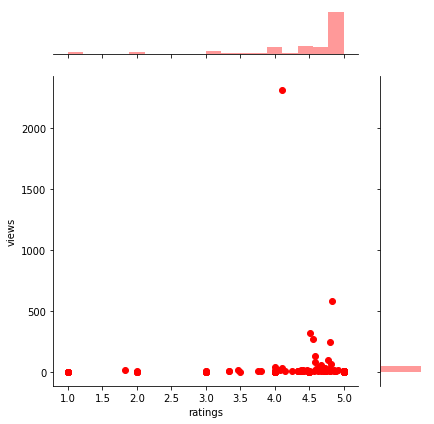

In [20]:
sn.jointplot(x="ratings", y="views", data=movie_views_max_rating, color="red", space=0.5)

### Create User & Movies viewed dataframe

In [21]:
ndf = pd.DataFrame(df)
ndf.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206,uid
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


### Creating users and watched movie list 

In [22]:
list_user_watch = []
for k in range(0, len(ndf)):
    lp = pd.DataFrame(ndf.loc[k])
    onlyviewd = lp.T.dropna(axis=1, how='all')
    user_id = onlyviewd.uid
    watched_movies = onlyviewd.drop(columns = 'user_id', axis=1).keys()
    for key in watched_movies:
        user_rating = ndf[ndf.uid==user_id[k]][key][k]
        list_user_watch.append([user_id[k], key, user_rating])

In [23]:
users_watch_info = pd.DataFrame(list_user_watch,columns=['user_id', 'moviename', 'rating'])
users_watch_info = users_watch_info[users_watch_info.moviename != 'uid']
users_watch_info

,user_id,moviename,rating
0,1,Movie1,5.0
1,1,Movie2,5.0
3,2,Movie3,2.0
5,3,Movie4,5.0
7,4,Movie4,5.0
...,...,...,...
9838,4844,Movie206,5.0
9840,4845,Movie206,5.0
9842,4846,Movie206,5.0
9844,4847,Movie206,5.0


In [24]:
movie_rating_final = movie_views.drop(columns="views", axis=1)
movie_rating_final

,moviename,ratings
126,Movie127,4.111976
139,Movie140,4.833910
15,Movie16,4.518750
102,Movie103,4.562500
28,Movie29,4.806584
...,...,...
53,Movie54,5.000000
115,Movie116,5.000000
114,Movie115,4.000000
54,Movie55,5.000000


In [25]:
result = pd.merge(users_watch_info, movie_rating_final, how="outer", on=["moviename"])
result[result['moviename']=="Movie127"]

,user_id,moviename,rating,ratings
52,47,Movie127,4.0,4.111976
53,371,Movie127,5.0,4.111976
54,373,Movie127,4.0,4.111976
55,398,Movie127,5.0,4.111976
56,413,Movie127,5.0,4.111976
...,...,...,...,...
2360,3832,Movie127,5.0,4.111976
2361,3833,Movie127,1.0,4.111976
2362,3834,Movie127,1.0,4.111976
2363,3835,Movie127,5.0,4.111976


In [26]:
result.rename(columns = {'ratings':'total_rating'}, inplace = True) 
result

,user_id,moviename,rating,total_rating
0,1,Movie1,5.0,5.000000
1,1,Movie2,5.0,5.000000
2,2,Movie3,2.0,2.000000
3,3,Movie4,5.0,5.000000
4,4,Movie4,5.0,5.000000
...,...,...,...,...
4995,4844,Movie206,5.0,4.923077
4996,4845,Movie206,5.0,4.923077
4997,4846,Movie206,5.0,4.923077
4998,4847,Movie206,5.0,4.923077


In [27]:
def generate_movieIds(x):
    movie_ids = [];
    for movie in range(0,len(x)):
        movie_ids.append(x[movie].split("Movie")[1])
    return movie_ids
#result['moviename'] = generate_movieIds(result.moviename)

In [28]:
result

,user_id,moviename,rating,total_rating
0,1,Movie1,5.0,5.000000
1,1,Movie2,5.0,5.000000
2,2,Movie3,2.0,2.000000
3,3,Movie4,5.0,5.000000
4,4,Movie4,5.0,5.000000
...,...,...,...,...
4995,4844,Movie206,5.0,4.923077
4996,4845,Movie206,5.0,4.923077
4997,4846,Movie206,5.0,4.923077
4998,4847,Movie206,5.0,4.923077


In [29]:
from surprise import Reader

In [30]:
reader = Reader(rating_scale=(1, 5))

In [31]:
from surprise import Dataset

In [32]:
data = Dataset.load_from_df(result[["user_id", "moviename", "rating"]], reader)
result[["user_id", "moviename", "rating"]].sort_values(by=['rating'])

,user_id,moviename,rating
2499,1191,Movie103,1.0
1368,2840,Movie127,1.0
4096,860,Movie90,1.0
4095,859,Movie90,1.0
4092,856,Movie90,1.0
...,...,...,...
2045,3517,Movie127,5.0
2046,3518,Movie127,5.0
2048,3520,Movie127,5.0
2030,3502,Movie127,5.0


In [33]:
from surprise import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result.drop(['rating','total_rating'],axis='columns'), result.rating, test_size=0.2)

In [35]:
X_train

,user_id,moviename
3776,4261,Movie140
537,2009,Movie127
4921,4757,Movie194
3075,970,Movie91
155,1627,Movie127
...,...,...
3940,4425,Movie140
86,1558,Movie127
1365,2837,Movie127
2362,3834,Movie127


In [36]:
y_train

3776    5.0
537     5.0
4921    5.0
3075    5.0
155     5.0
       ... 
3940    5.0
86      1.0
1365    5.0
2362    1.0
4452    5.0
Name: rating, Length: 4000, dtype: float64

In [37]:
trainingSet = data.build_full_trainset()
trainingSet

In [41]:
algo.fit(trainingSet)
prediction = algo.predict(5, "Movie1")
prediction.est

Computing the cosine similarity matrix...
Done computing similarity matrix.


5

### Define predict method and send user id to it to get the predictions details for all movies

In [58]:
def get_predictions(userid):
    user_pred = []
    for movie in range(0, len(np.array(movieslist))):
        prediction = algo.predict(userid, movieslist[movie])
        user_pred.append([movieslist[movie],prediction.est])
    return pd.DataFrame(user_pred, columns=['MovieName', 'Predicted'])
print(get_predictions(2840))

    MovieName  Predicted
0      Movie1   5.000000
1      Movie2   5.000000
2      Movie3   2.000000
3      Movie4   5.000000
4      Movie5   4.103448
..        ...        ...
201  Movie202   1.221358
202  Movie203   3.000000
203  Movie204   4.375000
204  Movie205   4.628571
205  Movie206   4.923077

[206 rows x 2 columns]
